# Predict using **Multiple Linear Regression**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
norm_df = pd.read_csv('../data/processed/5_normalized_data.csv')
smoten_df = pd.read_csv('../data/processed/5_smoten_data.csv')

In [3]:
norm_df.head(3)

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Cannabis
0,0.500963,0.99841,-2.111593,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,-0.324019,0.99841,-2.549090,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,4
2,0.500963,0.99841,0.075895,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3


In [4]:
smoten_df.head(3)

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Cannabis
0,0.500963,0.99841,-2.111593,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,-0.324019,0.99841,-2.549090,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,4
2,0.500963,0.99841,0.075895,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3


## Split Data

### Norm Data

In [5]:
norm_target = norm_df['Cannabis']
norm_feature = norm_df.drop('Cannabis', axis=1)
norm_feature.head(1)

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
0,0.500963,0.99841,-2.111593,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084


In [6]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(norm_feature, norm_target, test_size=0.2, random_state=42)
print(f'Train shape: {X_train_norm.shape}, Test shape: {X_test_norm.shape}')

Train shape: (1508, 10), Test shape: (377, 10)


### SMOTEN Data

In [7]:
smoten_target = smoten_df['Cannabis']
smoten_feature = smoten_df.drop('Cannabis', axis=1)
smoten_feature.head(1)

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
0,0.500963,0.99841,-2.111593,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084


In [8]:
X_train_smoten, X_test_smoten, y_train_smoten, y_test_smoten = train_test_split(smoten_feature, smoten_target, test_size=0.2, random_state=42)
print(f'Train shape: {X_train_smoten.shape}, Test shape: {X_test_smoten.shape}')

Train shape: (2592, 10), Test shape: (649, 10)


## Predict

### Predict Norm Data

In [9]:
linear_model = LinearRegression()

In [10]:
linear_model.fit(X_train_norm, y_train_norm)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
norm_predict = linear_model.predict(X_test_norm)

In [12]:
# Limiting the values between 0 and 6
import numpy as np
norm_predict = np.clip(norm_predict, 0, 6)


### Residual Analysis

In [13]:
columns = norm_df.columns
formula = 'Cannabis ~ ' + ' + '.join(columns[:-1])
formula


'Cannabis ~ Age + Gender + Education + Nscore + Escore + Oscore + AScore + Cscore + Impulsive + SS'

In [14]:
model = smf.ols(formula, norm_df).fit()

In [15]:
model.resid

0      -2.307731
1       0.028005
2       0.114695
3      -0.726549
4       0.988087
          ...   
1880   -0.355303
1881   -1.675768
1882    3.517644
1883    0.762937
1884   -1.964323
Length: 1885, dtype: float64

In [16]:
resid = np.clip(model.resid, 0, 6)

#### Redisual Normality

In [17]:
_, p = stats.shapiro(resid)
p

np.float64(9.665737456731236e-49)

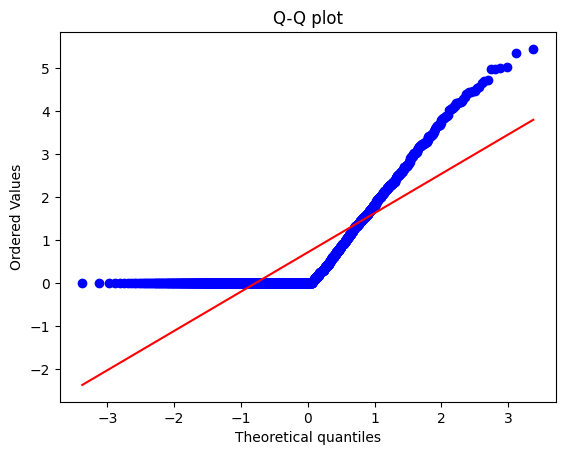

In [18]:
stats.probplot(resid, dist='norm', plot=plt)
plt.title('Q-Q plot');

(array([1202.,  175.,  166.,  117.,   94.,   57.,   32.,   25.,   11.,
           6.]),
 array([0.        , 0.54406279, 1.08812558, 1.63218837, 2.17625116,
        2.72031395, 3.26437674, 3.80843953, 4.35250232, 4.8965651 ,
        5.44062789]),
 <BarContainer object of 10 artists>)

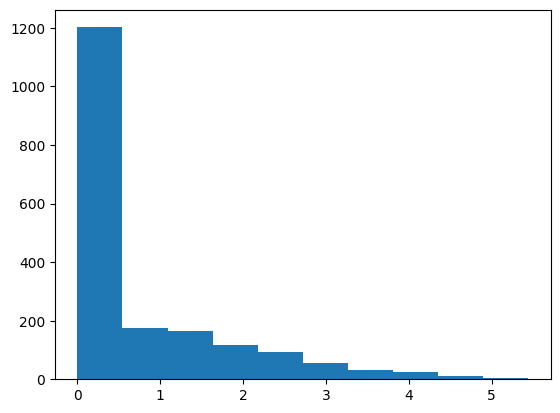

In [19]:
plt.hist(resid)

#### Residual Homoscedasticity
- true - p > 0.5
- false - p <= 0.5

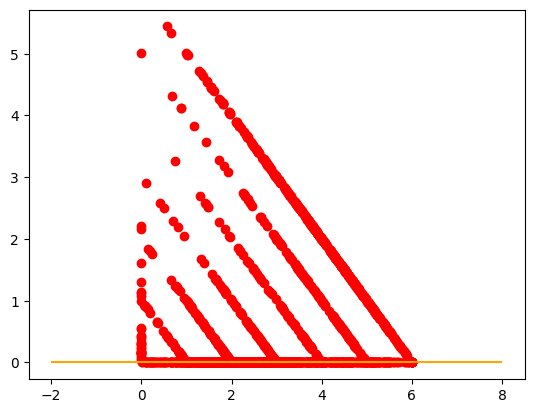

In [20]:
plt.scatter(y=resid, x=np.clip(model.predict(), 0, 6), color='red')
plt.hlines(y=0, xmin=-2, xmax=8, color='orange')

In [21]:
_, p, _, _ = sms.het_breuschpagan(resid, np.clip(model.model.exog, 0, 6))
p

np.float64(0.00015726517284537922)

#### Outliers
- Between 3 and -3

In [22]:
outliers = model.outlier_test()
outliers.max()

student_resid    3.095557
unadj_p          0.999733
bonf(p)          1.000000
dtype: float64

In [23]:
outliers.min()

student_resid   -2.967313
unadj_p          0.001994
bonf(p)          1.000000
dtype: float64

#### Multicollinearity test
- r > 0.9

In [24]:
features = norm_df.drop('Cannabis', axis=1)
features.head(1)

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
0,0.500963,0.99841,-2.111593,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084


<Axes: >

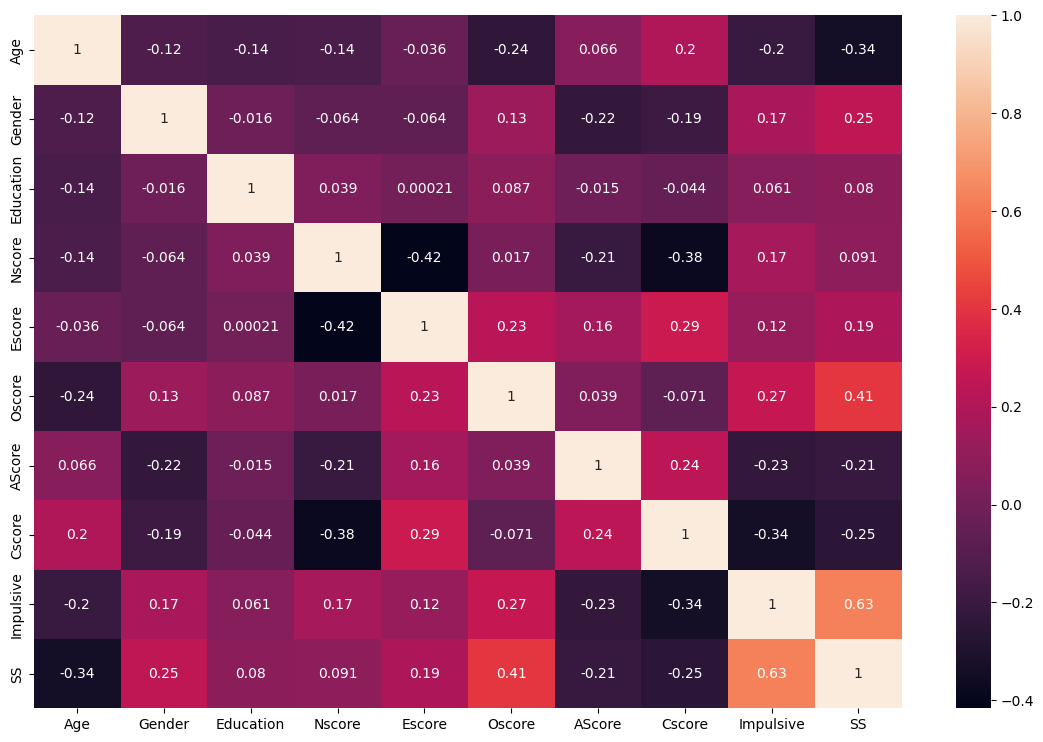

In [25]:
correlation = features.corr(method='spearman')
plt.figure(figsize=(14, 9))
sns.heatmap(correlation, annot=True)

#### Model Analysis
- p_value for each feature | < 0.05, statistically significant

In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Cannabis   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     127.8
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          2.36e-203
Time:                        00:19:47   Log-Likelihood:                -3743.9
No. Observations:                1885   AIC:                             7510.
Df Residuals:                    1874   BIC:                             7571.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9910      0.041     73.423      0.0

In [27]:
final_norm_df = norm_df.copy()
final_norm_df['Prediction'] = np.clip(model.fittedvalues, 0, 6)
final_norm_df.head(1)

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Cannabis,Prediction
0,0.500963,0.99841,-2.111593,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,2.307731


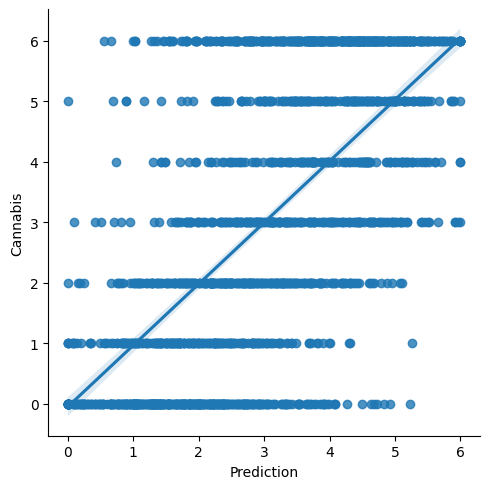

In [28]:
sns.lmplot(y='Cannabis', x='Prediction', data=final_norm_df)

### Predict SMOTEN Data

In [29]:
columns = smoten_df.columns
formula = 'Cannabis ~ ' + ' + '.join(columns[:-1])
formula

'Cannabis ~ Age + Gender + Education + Nscore + Escore + Oscore + AScore + Cscore + Impulsive + SS'

In [30]:
model = smf.ols(formula, smoten_df).fit()

In [31]:
model.resid

0      -2.086159
1       0.193249
2       0.190751
3      -0.699582
4       1.150154
          ...   
3236    0.638560
3237   -0.250742
3238    0.805905
3239   -0.661569
3240    0.158027
Length: 3241, dtype: float64

In [32]:
resid = np.clip(model.resid, 0, 6)

#### Residual Normality

In [33]:
_, p = stats.shapiro(resid)
p

np.float64(1.1711968942765378e-60)

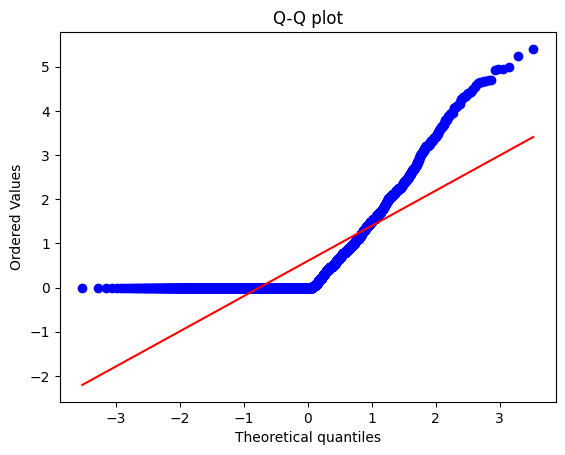

In [34]:
stats.probplot(resid, dist='norm', plot=plt)
plt.title('Q-Q plot');

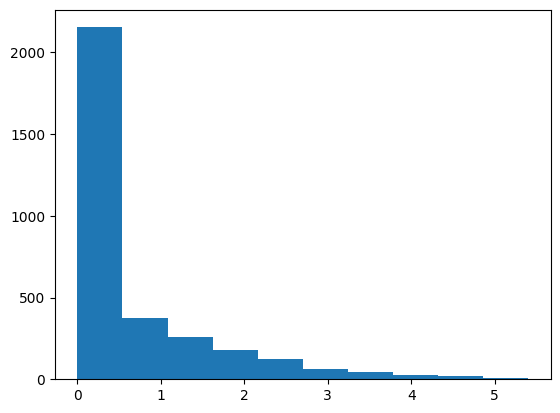

In [35]:
plt.hist(resid);

#### Residual Homocedasticity

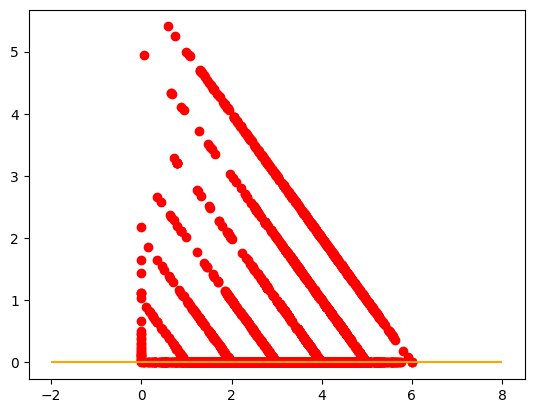

In [36]:
plt.scatter(y=resid, x=np.clip(model.predict(), 0, 6), color='red')
plt.hlines(y=0, xmin=-2, xmax=8, color='orange')

In [37]:
_, p, _, _ = sms.het_breuschpagan(resid, np.clip(model.model.exog, 0, 6))
p

np.float64(2.3094822624752207e-11)

#### Outliers Test

In [38]:
outliers = model.outlier_test()
outliers.max()

student_resid    3.545836
unadj_p          0.999739
bonf(p)          1.000000
dtype: float64

In [39]:
outliers.min()

student_resid   -3.325106
unadj_p          0.000397
bonf(p)          1.000000
dtype: float64

#### Model Analysis

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Cannabis   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     230.5
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:19:55   Log-Likelihood:                -5972.5
No. Observations:                3241   AIC:                         1.197e+04
Df Residuals:                    3230   BIC:                         1.203e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9066      0.029    100.088      0.0

In [41]:
final_smoten_df = smoten_df.copy()
final_smoten_df['Prediction'] = np.clip(model.fittedvalues, 0, 6)
final_smoten_df.head(1)

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Cannabis,Prediction
0,0.500963,0.99841,-2.111593,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,2.086159


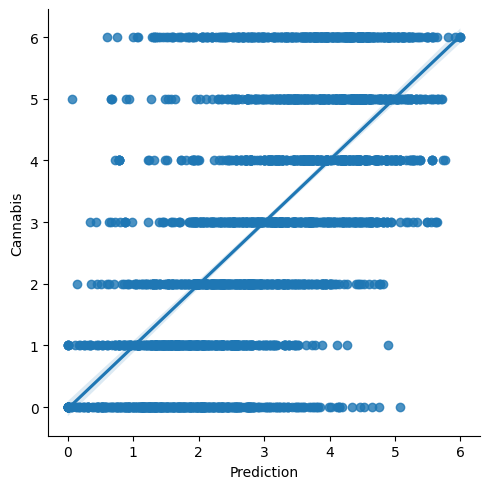

In [42]:
sns.lmplot(x='Prediction', y='Cannabis', data=final_smoten_df)